In [57]:
import pandas as pd
import numpy as np
import torch
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings('ignore')

In [58]:
data=pd.read_csv('/content/drive/MyDrive/비타민 프로젝트/data10.csv')

In [59]:

!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 5.16 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2023-01-31 10:30:58--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::3403:4be7, 2406:da00:ff00::22c5:2ef4, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
mecab = Mecab() 

In [60]:
#불용어 설정
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게', '만','로','막','되','협찬','광고','제품']

In [61]:
data['tokenized'] =data['text'].astype(str).apply(mecab.morphs)
data['tokenized'] =data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [62]:
data

,text,label,tokenized
0,사전동 젖병 세척솔 사실상 이걸 쓰려고 쓰는 포스트이기도 한 출산 전 모두가 몽글...,0,"[사, 전동, 젖병, 세척, 솔, 사실, 상, 이걸, 쓰, 려고, 쓰, 포스트, 기..."
1,사수유 시트 분유수유할 때 쓰는 걸로 유명한 수유 시트죠 모양이 고정된 만원대에서...,0,"[사, 수유, 시트, 분유, 수유, 할, 때, 쓰, 걸로, 유명, 수유, 시트, 죠..."
2,사 아기비데 아기 비 데는 사실 나 가젤 유명하죠 저는 당시에라이브 방송에서 핫딜...,0,"[사, 아기, 비데, 아기, 비, 데, 사실, 나, 가젤, 유명, 죠, 저, 당시,..."
3,사 홈캠 이건 추천이기도 하고 불편한 점 홈캠 자체는 정말 추천 조리원 퇴소하고 ...,0,"[사, 홈, 캠, 이건, 추천, 기, 불편, 점, 홈, 캠, 자체, 정말, 추천, ..."
4,바구니 배 금액 성인 불 아동 불 불 만 세까지 아동 만 세 이하 무료 저는 남자...,0,"[바구니, 배, 금액, 성인, 불, 아동, 불, 불, 세, 까지, 아동, 세, 이하..."
...,...,...,...
20942,제품 협찬 피부 보습부터 장벽 강화까지 한 번에 아쿠아리차지 트리트먼트 에센스 모...,1,"[피부, 보습, 부터, 장벽, 강화, 까지, 번, 아쿠아, 리, 차지, 트리트, 먼..."
20943,제품 협찬 편안하면서 고급스러운 라브데뜨브이넥 부소매트임랩 리본롱 원피스에 요 가...,1,"[편안, 면서, 고급, 스러운, 라브, 데, 뜨, 브이넥, 부소, 매트, 랩, 리본..."
20944,제품 협찬 심플하면서도 이지한 린넨 슬랙스에요 편안하고 시원한 린넨 소재로 멋스럽...,1,"[심플, 면서, 이지한, 린, 넨, 슬랙스, 요, 편안, 시원, 린, 넨, 소재, ..."
20945,협찬 은 자연유래 성분만을 고집하는 입욕 코스메틱 브랜드입니다 당신이 가장 사랑하...,1,"[자연, 유래, 성분, 고집, 입욕, 코, 스메, 틱, 브랜드, 입니다, 당신, 가..."


In [63]:
# 데이터들의 행과 열 합치기
noad_words = np.hstack(data[data.label == 0]['tokenized'].values)
ad_words = np.hstack(data[data.label == 1]['tokenized'].values)
     

In [64]:
noad_word_count = Counter(noad_words)
print(noad_word_count.most_common(20))

[('먹', 11406), ('있', 11214), ('좋', 7259), ('주', 7088), ('어요', 6688), ('어', 6667), ('맛집', 6576), ('맛', 6403), ('었', 6041), ('는데', 5250), ('으로', 5021), ('기', 4902), ('면', 4797), ('보', 4516), ('아', 4220), ('그램', 4168), ('내', 4021), ('했', 3853), ('나', 3813), ('해', 3747)]


In [65]:
ad_word_count = Counter(ad_words)
print(ad_word_count.most_common(20))

[('있', 18845), ('어요', 11585), ('어', 9948), ('주', 9769), ('수', 9298), ('좋', 9282), ('먹', 8587), ('었', 8537), ('으로', 8486), ('기', 7579), ('해', 7342), ('에서', 5987), ('보', 5824), ('는데', 5533), ('요', 5472), ('아', 5331), ('면', 5210), ('시', 4645), ('했', 4434), ('할', 4432)]


In [66]:

#matplotlib 한국어 지원을 위한 패키지 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
     

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/na

In [67]:
plt.rc('font', family='NanumBarunGothic') 
ny=[int(i[1]) for i in noad_word_count.most_common(10)]
nx=[i[0] for i in noad_word_count.most_common(10)]
ay=[int(i[1]) for i in ad_word_count.most_common(10)]
ax=[i[0] for i in ad_word_count.most_common(10)]

Text(0.5, 1.0, '광고가 아닌 데이터셋의 최빈 단어')

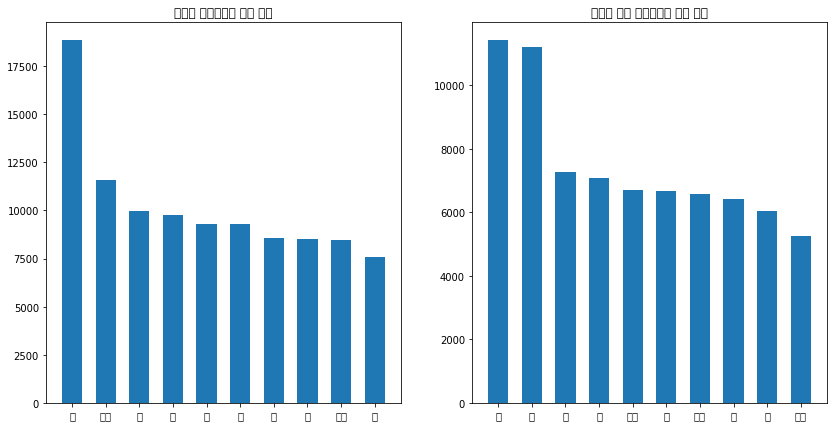

In [68]:

figure, axis = plt.subplots(1, 2,figsize=(14,7))
index = np.arange(len(ay))
axis[0].bar(ax,ay,width=0.6, align='center')
axis[0].set_title("광고인 데이터셋의 최빈 단어")
axis[1].bar(nx,ny,width=0.6, align='center')
axis[1].set_title("광고가 아닌 데이터셋의 최빈 단어")

광고성 글의 평균 길이 : 102.07489610880242
광고가 아닌 글의 평균 길이 : 81.46597161888214


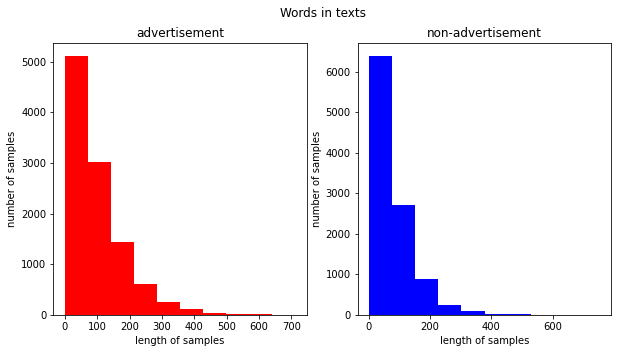

In [69]:

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = data[data['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('advertisement')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('광고성 글의 평균 길이 :', np.mean(text_len))

text_len = data[data['label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('non-advertisement')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('광고가 아닌 글의 평균 길이 :', np.mean(text_len))
plt.show()

In [70]:
from sklearn.model_selection import train_test_split
X_train,test_x,y_train,test_y=train_test_split(data['tokenized'].values,data['label'].values,test_size=0.3,random_state=3,stratify=data['label'].values)
X_valid, X_test, y_valid, y_test = train_test_split(test_x,test_y,test_size=0.5,random_state=3,stratify=test_y)

In [71]:
len(X_train),len(test_x)

(14662, 6285)

In [72]:
len(X_valid),len(X_test)
     

(3142, 3143)

In [18]:
X_train2,test_x2,y_train2,test_y2=train_test_split(data['text'].values,data['label'].values,test_size=0.3,random_state=3,stratify=data['label'].values)

In [ ]:
#X_train,y_train 데이터프레임으로 만들어놓기
train_data2 = pd.DataFrame(zip(X_train2,y_train2), columns = ['text','label'])

In [ ]:
train_data2.to_csv('/content/drive/MyDrive/비타민 프로젝트/train_data2.csv', index = False)

In [ ]:
train_data2

,text,label
0,함박스테이크고메고메함박스테이크 역시고메함박은알럽 치즈찐득함모짜렐라크림치즈고다치즈진...,0
1,방문해보니 층 전 층에서 럭셔리 호텔 침구류들을 만나볼 수 있었고 특히나 최고급 ...,1
2,찐후기 감사합니다 언제나 최선을 다하겠습니다 맑음 사진관 가족사진 가족 돌상 촬영...,0
3,일단 어떤 사이트인지 궁금했기에 검색 포털에서 플레이를 찾아보았어요 몰랐는데 유튜...,1
4,안녕하세요 컬러리스트 찬영입니다 오늘은 뿌리탈 색 회 전체 탈색 회 후 애쉬그레이...,1
...,...,...
14657,치킨치맥 오늘은 너무 술을 먹고 싶었어요 진짜 취할 때까지 마시고 싶은 날 있잖아...,0
14658,깔끔한 밑반찬 구성 콩나물 멸치 어묵 오이 부추김치 고추 간도 다 알맞고 맛있었다,0
14659,쌉사래하면서도 달달한 말차크림과 바삭한 웨하스 과자가 굉장히 조화로운 상품이었다 ...,0
14660,콰트로치즈 칼칼칼퇴후버거킹 수정됨 주,0


In [ ]:
#test_x, test_y 데이터프레임으로 만들어놓기
test_data2=pd.DataFrame(zip(test_x2,test_y2), columns = ['text','label'])

In [ ]:
test_data2

,text,label
0,딥몽기적 베개라는 솜으로 제작한 베개인데요 국내 기업에서 만든 상품이라서 원산지도...,1
1,사실 미루끙아 냄새가 은근히 강렬하그든요 라벤더 향 똥츄로라도 덮어보겠다는 의지 ...,0
2,고급스러운 분위기에 와인 한잔 하기 좋은 방이 동 감성 와인 바몽 보홍 서울 송파...,1
3,냄새를 맡아보려는데코를 가까이 대면 코를 엄청 간 질임 가까이가기가 힘듬 끓는 물...,0
4,다도참 주가 막걸리 협찬 이번에 요즘 잘 나가는 다도참 주가 막걸리를 먹어봤는데요...,1
...,...,...
6280,치킨매니아 트윙클치킨 협찬 이번에 치킨매니아에서 레게 노치킨 탄으로 나온 트윙 클...,1
6281,무조건 챙겨 다니는 쉐이크와 유 비 콜 아침을 먹지 않는 저이기에 아침 대용으로 ...,0
6282,총평 자일리톨캔디 애니타임 은 양쪽 끝에 반투명한 부분은 바닐라 맛이 났고 가운데...,0
6283,음식물 처리 기 용량의 경우에는 최대 도 처리를 할 수 있어서 일반 가정집부터 시...,1


In [ ]:
test_data2.to_csv('/content/drive/MyDrive/비타민 프로젝트/test_data2.csv', index = False)

In [73]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train) 

In [74]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합(vocabulary)의 크기 : 37567
등장 빈도가 1번 이하인 희귀 단어의 수: 13527
단어 집합에서 희귀 단어의 비율: 36.0076663028722
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.0039044439117466
단어 집합의 크기 : 24042


In [75]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_valid = tokenizer.texts_to_sequences(X_valid)
     

In [76]:
print(X_valid[:3])

[[215, 3754, 215, 15, 202, 1097, 215, 3, 108, 1411, 2334, 32, 47, 2, 595, 423, 8, 24, 724, 5978, 3, 221, 101, 119, 349, 167, 5, 211, 6, 3, 11, 144, 7, 350, 149, 3, 11, 144, 2364, 76, 798, 1097, 215, 352, 5650, 118, 79, 3, 53, 350, 8855, 409, 1971, 215, 2758, 5], [12192, 742, 6970, 9566, 8630, 6970, 2468, 156, 1, 96, 2926, 1406, 273, 306, 5, 1, 1, 1, 196, 7990, 5480, 44, 64, 94, 57, 55, 61], [104, 127, 279, 2960, 1467, 5624, 3719, 245, 9, 329, 11, 3154, 192, 131, 52, 972, 592, 59, 45, 3, 7796, 245, 1221, 6, 112, 39, 30, 2521, 68, 7280, 1231, 19, 5, 16, 294, 3076, 296, 6, 2, 6, 742, 11, 290, 127, 279, 2960, 1467, 5624, 3719, 3999, 1118, 956, 2128, 8035, 207, 28, 19, 472, 41, 1952, 756, 32, 10, 2, 180, 594, 65, 19, 1780, 32, 10, 2, 114, 127, 279, 2960, 5624, 3719, 415, 3719, 182, 415, 3719, 19, 904, 378, 182, 139, 940, 434, 842, 139, 842, 139, 842, 232, 378, 1205, 1205, 139, 5624, 3719, 27, 415, 3719, 27, 127, 279, 2960, 5624, 3719, 2388, 4150, 2388, 4150, 1109, 469, 127, 279, 2960, 1109,

리뷰의 최대 길이 : 713
리뷰의 평균 길이 : 91.90008184422317


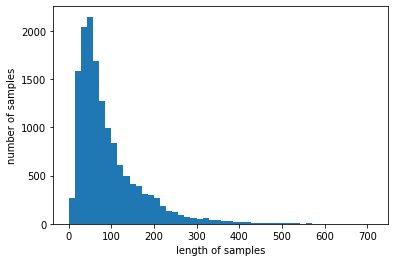

In [77]:

print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [78]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [79]:
max_len = 700
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 700 이하인 샘플의 비율: 99.99317964806984


In [80]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)
X_valid = pad_sequences(X_valid , maxlen = max_len)
     

In [81]:

import re
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:

model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('/content/drive/MyDrive/비타민 프로젝트/bilstm_model_0131.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[mc], batch_size=256, validation_data=(X_valid, y_valid))

Epoch 1/15
58/58 [==============================] - ETA: 0s - loss: 0.5142 - acc: 0.7494
Epoch 1: val_acc improved from -inf to 0.85805, saving model to /content/drive/MyDrive/비타민 프로젝트/bilstm_model2.h5
58/58 [==============================] - 372s 6s/step - loss: 0.5142 - acc: 0.7494 - val_loss: 0.3413 - val_acc: 0.8581
Epoch 2/15
58/58 [==============================] - ETA: 0s - loss: 0.2879 - acc: 0.8878
Epoch 2: val_acc improved from 0.85805 to 0.87078, saving model to /content/drive/MyDrive/비타민 프로젝트/bilstm_model2.h5
58/58 [==============================] - 359s 6s/step - loss: 0.2879 - acc: 0.8878 - val_loss: 0.3450 - val_acc: 0.8708
Epoch 3/15
58/58 [==============================] - ETA: 0s - loss: 0.2111 - acc: 0.9255
Epoch 3: val_acc improved from 0.87078 to 0.88192, saving model to /content/drive/MyDrive/비타민 프로젝트/bilstm_model2.h5
58/58 [==============================] - 356s 6s/step - loss: 0.2111 - acc: 0.9255 - val_loss: 0.2995 - val_acc: 0.8819
Epoch 4/15
58/58 [==========

In [28]:

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
     

NameError: ignored

In [29]:
loaded_model = load_model('/content/drive/MyDrive/비타민 프로젝트/bilstm_model2.h5')
print("테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

99/99 [==============================] - 29s 265ms/step - loss: 0.3019 - acc: 0.8781
테스트 정확도: 0.8781


In [ ]:
from sklearn.metrics import classification_report
th=0.26
y_pred = (loaded_model.predict(X_test)[:,0] >= th).astype(int)
print(classification_report(y_test, y_pred))
     

99/99 [==============================] - 27s 262ms/step
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      1554
           1       0.85      0.91      0.88      1589

    accuracy                           0.87      3143
   macro avg       0.87      0.87      0.87      3143
weighted avg       0.87      0.87      0.87      3143



In [ ]:
from sklearn.metrics import classification_report
th=0.1
y_pred = (loaded_model.predict(X_test)[:,0] >= th).astype(int)
print(classification_report(y_test, y_pred))

99/99 [==============================] - 26s 261ms/step
              precision    recall  f1-score   support

           0       0.93      0.70      0.80      1554
           1       0.77      0.95      0.85      1589

    accuracy                           0.83      3143
   macro avg       0.85      0.83      0.83      3143
weighted avg       0.85      0.83      0.83      3143



In [ ]:

from sklearn.metrics import classification_report
for th in np.arange(0.2,0.30,0.01):
  print("threshold: %.2f"%th)
  y_pred = (loaded_model.predict(X_test)[:,0] >= th).astype(int)
  print(classification_report(y_test, y_pred))

threshold: 0.20
99/99 [==============================] - 26s 264ms/step
              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1554
           1       0.83      0.92      0.87      1589

    accuracy                           0.86      3143
   macro avg       0.87      0.86      0.86      3143
weighted avg       0.87      0.86      0.86      3143

threshold: 0.21
99/99 [==============================] - 26s 264ms/step
              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1554
           1       0.83      0.92      0.87      1589

    accuracy                           0.86      3143
   macro avg       0.87      0.86      0.86      3143
weighted avg       0.87      0.86      0.86      3143

threshold: 0.22
99/99 [==============================] - 26s 266ms/step
              precision    recall  f1-score   support

           0       0.90      0.81      0.86      1554
           1       0.

In [30]:
#테스트 데이터 
df2=pd.read_csv('/content/drive/MyDrive/비타민 프로젝트/네이버지도테스트최종데이터.csv')


In [31]:
df2=df2.drop(['label'],axis=1)

In [32]:
df2

,text
0,🔮너무 마음에 들어요🔮 다이슨 에어랩 하고 4시간 정도 지나서 적당히 풀린 듯한 깔...
1,레이어드컷 처음 해봤는데 너무 예쁘고 만족스럽게 잘됐어요 감사합니다!\n정말 상담도...
2,너어어어어어무 예뻐요 너무너무너무\n이제 머리 감고 그냥 풀고 다닐 수 있어서 너무...
3,솜브레로 탈색과 염색하고 얇아진 모발에 딱이던 스페셜 클리닉. 꼬모레비로 받았어요....
4,헤그리드--->참한 여인 헤어 시술 받구 지금 제가 느낀 감정이예요! 타샵에서 무지...
...,...
198,계속 미루다가 뿌리 엄청 지저분한 상태로 갔는데 너무 깨끗하게 정리해주셨어요! 내일...
199,성령 수석 실장님께서 이쁘게 잘라주셔서 매번 만족합니다~ 방문 때마다 친철하심은 물...
200,성령 실장님 이쁘게 잘 잘라주셔서 감사해요~!😍 늘 믿고 맡깁니다~ 머리를 항상 너...
201,"오늘은 뿌리염색&신데렐라클리닉& 두피스케일링하러 왔어요, 정기적으로 오는 이곳🤍 올..."


In [33]:
!pip install kss

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.7/77.7 KB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kss: filename=kss-4.5.1-py3-none-any.whl size=53218 sha256=62632b17e7e65c56b069ce0efdea3a074ded9eedb86fdd3d55cc5da42855c00a
  Stored in directory: /root/.cache/pip/wheels/8c/f9/05/a93eb0defc9eed494ee4d42e3d9076fade98f08982f41cf09f
  Created wheel for pecab: filename=pecab-1.0.8-py3-none-any.whl size=26646667 sha256=e2cf3c96b0339d0ace8e2bcb8e3eba008492bb5060c785ae8278ac7adc60967c
  Stored in directory: /root/.cache/pip/wheels/a9/98/a3/085a909aa25805f321467a3af3b80d43b6094ed335b4818775
Successfully built kss pecab


In [34]:
!proper installation of python3
!proper installation of pip

!pip install tensorflow
!pip install keras

!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

/bin/bash: proper: command not found
/bin/bash: proper: command not found
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-u2b7egvz
  Running command git clone --filter=blob:none --quiet https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-u2b7egvz
  Resolved https://github.com/haven-jeon/PyKoSpacing.git to commit fc2eb9f7837c9f4d256560a47437f4c11decb934
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.8/511.8 MB 2.0 MB/s eta 0:00:00
  Created wheel for pykospacing: filename=pykospacing-0.5-py3-none-any.whl size=2268650 sha256=e4b777025974f9f90ba2c3e3d2f094a0f54acf22ae230f29482b314928fd1320
  Stored in directory: 

In [35]:
# 띄어쓰기 
from pykospacing import Spacing
spacing = Spacing()
import kss

def sentiment_predict(new_sentence):
  new_sentence=new_sentence.replace(" ", "")
  new_sentence=spacing(new_sentence)
  new_sentence=kss.split_sentences(new_sentence)
  new_sentence=str(new_sentence)
  new_sentence= re.sub(r'[^가-힣 ]','', new_sentence)
  new_sentence = mecab.morphs(new_sentence) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    df2['evaluation'][i]="{:.2f}% 확률로 광고입니다.".format(score * 100)
  else:
    df2['evaluation'][i]="{:.2f}% 확률로 광고가 아닙니다.".format((1 - score) * 100)

In [36]:
df2['evaluation']=0

In [37]:
df2

,text,evaluation
0,🔮너무 마음에 들어요🔮 다이슨 에어랩 하고 4시간 정도 지나서 적당히 풀린 듯한 깔...,0
1,레이어드컷 처음 해봤는데 너무 예쁘고 만족스럽게 잘됐어요 감사합니다!\n정말 상담도...,0
2,너어어어어어무 예뻐요 너무너무너무\n이제 머리 감고 그냥 풀고 다닐 수 있어서 너무...,0
3,솜브레로 탈색과 염색하고 얇아진 모발에 딱이던 스페셜 클리닉. 꼬모레비로 받았어요....,0
4,헤그리드--->참한 여인 헤어 시술 받구 지금 제가 느낀 감정이예요! 타샵에서 무지...,0
...,...,...
198,계속 미루다가 뿌리 엄청 지저분한 상태로 갔는데 너무 깨끗하게 정리해주셨어요! 내일...,0
199,성령 수석 실장님께서 이쁘게 잘라주셔서 매번 만족합니다~ 방문 때마다 친철하심은 물...,0
200,성령 실장님 이쁘게 잘 잘라주셔서 감사해요~!😍 늘 믿고 맡깁니다~ 머리를 항상 너...,0
201,"오늘은 뿌리염색&신데렐라클리닉& 두피스케일링하러 왔어요, 정기적으로 오는 이곳🤍 올...",0


In [38]:
for i in range (0,203):
  sentiment_predict(df2['text'][i])

1/1 [==============================] - 0s 209ms/step


In [41]:
#10개
df2[0:50]

,text,evaluation
0,🔮너무 마음에 들어요🔮 다이슨 에어랩 하고 4시간 정도 지나서 적당히 풀린 듯한 깔...,94.52% 확률로 광고가 아닙니다.
1,레이어드컷 처음 해봤는데 너무 예쁘고 만족스럽게 잘됐어요 감사합니다!\n정말 상담도...,54.87% 확률로 광고가 아닙니다.
2,너어어어어어무 예뻐요 너무너무너무\n이제 머리 감고 그냥 풀고 다닐 수 있어서 너무...,69.46% 확률로 광고가 아닙니다.
3,솜브레로 탈색과 염색하고 얇아진 모발에 딱이던 스페셜 클리닉. 꼬모레비로 받았어요....,60.50% 확률로 광고입니다.
4,헤그리드--->참한 여인 헤어 시술 받구 지금 제가 느낀 감정이예요! 타샵에서 무지...,89.54% 확률로 광고가 아닙니다.
5,진짜 머리두 마음두 힐링해주시는 단아쌤♥︎ 컬은 물론이고 앞머리때문에 옆머리때문에 ...,89.35% 확률로 광고입니다.
6,크리닉 했는데 빗질도 너무 잘되고 윤기도 촤라락 흘러서 보들보들 넘 조아용ㅠㅠ 워터...,75.75% 확률로 광고입니다.
7,"완전 인생 머리 만났습니다!!!✋✋정문 디자이너님 상담 진행 너무 친절하시고, 원하...",93.26% 확률로 광고입니다.
8,오랜만에 정말 맘에 드는 미용실이라 리뷰 남겨요✋ 칸 실장님 상담 진행 정말 친절하...,87.91% 확률로 광고입니다.
9,강남 이철헤어커커 지영쌤에게 레드브라운 염색 시술받았습니다!\n\n첫방문인데 정말 ...,63.62% 확률로 광고입니다.


In [42]:
#28개
df2[50:100]

,text,evaluation
50,오늘 민경쌤한테 뿌리탈색하고 염색받으러 갔어요♥_ 손상되는 부분없이 시술해주시려고 ...,84.35% 확률로 광고입니다.
51,원래 탈색모발이였어서 뿌리탈색은 그만하면서 너무 어둡지 않게 염색하고 싶어서 고민을...,52.99% 확률로 광고입니다.
52,쨍한 오렌지 색깔로 염색했다가 계절도 바뀌고 지겨워져서 컬러 바꾸러 갔어요! 뿌리탈...,94.53% 확률로 광고가 아닙니다.
53,항상 머리짜르고 뒷머리가 궁금했는데 직접 머리도 찍어주시고 혜화 머리 맛집은 확실히...,62.48% 확률로 광고가 아닙니다.
54,정년선생님 시술 너무 잘해주셔서 감사해요 샴푸시원하게 해주 수진님 너무 시원했어요 ...,69.62% 확률로 광고입니다.
55,이번에도 고은선생님께 머리를 했는데 역시나 기대이상이에요 머리만지는 방법도 알려주시...,79.12% 확률로 광고입니다.
56,애매한 머리길이였는데 드랍컷 스타일 추천해주셨는데 너무 맘에 들어요 희빈쌤 만나서 ...,52.80% 확률로 광고입니다.
57,짧은 머리에서 기르고 있었는데 은진 선생님 만나서 얼굴이 작아졌어요 짧은 머리에서 ...,50.27% 확률로 광고입니다.
58,인철선생님에게만 머리 합니다!! 제 여러 스타일을 만들어주신분 시스루 스타일부터 쭉...,91.33% 확률로 광고입니다.
59,항상 덥수룩한 머리만 하다가 날씨도 더워서 짧게 잘라봤는데 정국선생님이 스타일제안을...,54.33% 확률로 광고가 아닙니다.


In [84]:
#22
df2[100:153]

,text,evaluation
100,검은 머리가 너무 지겨워서 애쉬베이지 솜브레염색을 해봤어요~ 처음 해보는 염색인데 ...,53.93% 확률로 광고입니다.
101,애쉬베이지 발레아쥬 염색을 해보았습니다. 이름도 어려운데 ! 엄청난 스킬이 느껴지는...,52.58% 확률로 광고입니다.
102,몇년동안 탈색머리유지하다가 블랙으로 단정하게 바꿔봤어요 탈색으로 머릿결상해있어서 와...,92.35% 확률로 광고입니다.
103,시세이도모발클리닉 후 스타일링받았습니다 원하는대로 자연스럽고 여성스럽게 잘 해주셔서...,81.00% 확률로 광고가 아닙니다.
104,애즈펌 처음해봤는데 너무 마음에 들어요!! 머리 손질도 더 쉬워졌어요. 깔끔하게 해...,88.16% 확률로 광고입니다.
105,지난 번 염색 만족도가 높아서 한번 더! 했습니다 ㅎ 여행 사진 이쁘게 찍어 올게요!!,51.95% 확률로 광고가 아닙니다.
106,"계속 같은 선생님, 부원장선생님께 관리받고있어요. 지난번 펌 했던 내용 꼼꼼하게 기...",92.23% 확률로 광고입니다.
107,새로운 스타일 시도했는데 얼굴형에 맞게 잘 해주셔서 낯설지않고 ㅇ이상하지않게 됐습니...,84.41% 확률로 광고가 아닙니다.
108,툭툭털어 만져도 스타일이 잘나와서 만지기 쉽고 느낌좋게 커트를 잘하십니다~! 이날 ...,94.22% 확률로 광고가 아닙니다.
109,그냥 머리 맞춤머리마냥 잘짤라주셔서 감사합니다 ㅋ 망하는 날 없이 항상 입맛에 맞게...,63.85% 확률로 광고가 아닙니다.


In [83]:
df2[153:204]

,text,evaluation
153,펌이 많이 풀려서 (무려 한지 1년정도 되었는데도... 컬이 유지가 되었지요..👉🏻...,99.04% 확률로 광고가 아닙니다.
154,여름휴가 전에 머리하러 왔는데용 항상 너무 친절하시고 머리도 예쁘게 원하는대루 해주...,98.83% 확률로 광고가 아닙니다.
155,앞머리펌과 뿌리염색을 하였습니당🤩 너무 예쁘고 맘에들어용~~~!!!👍🏻👍🏻👍🏻 모든...,99.06% 확률로 광고가 아닙니다.
156,연말이 되어서 머리도 변화를 줘야될것같아서 살롱오디너리 서우부원장님을 방문했는데용!...,93.60% 확률로 광고가 아닙니다.
157,여자머리맛집입니당!!!🙊 요기 서우쌤 정말 머리 잘해주세용!! 머릿결도 안상하구 항...,98.72% 확률로 광고가 아닙니다.
158,역시~~ 매번 느끼지만 머리로 힐링시켜주시는 서우부원장님🙏🏻🥺 오늘두 머리 이쁘게 ...,92.61% 확률로 광고가 아닙니다.
159,펌이 지겨워서 이번에는 매직을 하게 되었는데용~ 머릿결이 하나도 안상하게 이쁘게 해...,87.44% 확률로 광고가 아닙니다.
160,예뽀지고 싶으면 유리실장님한테 가세여 🧸🫶 맨날 단발허쉬만 고집하다가 처음으로 열심...,61.10% 확률로 광고가 아닙니다.
161,유림실장님한테 다닌지 햇수로 5년? 정도 된 거 같은데 실장님한테 머리맡기구 다녀오...,97.51% 확률로 광고가 아닙니다.
162,유림실장님한테 처음으로 허쉬컷 도전했다가 4년동안 허쉬컷은 무조건 유림실장님한테만 ...,98.10% 확률로 광고가 아닙니다.


In [49]:
df2.to_csv('/content/drive/MyDrive/비타민 프로젝트/테스트데이터로예측_bilstm.csv', index = False)

In [ ]:

from sklearn.metrics import classification_report
for th in np.arange(0.1,0.7,0.1):
  y_pred = (loaded_model.predict(X_test)[:,0] >= th).astype(int)
  print(classification_report(y_test, y_pred))

99/99 [==============================] - 16s 158ms/step
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      1554
           1       0.82      0.95      0.88      1589

    accuracy                           0.87      3143
   macro avg       0.88      0.87      0.87      3143
weighted avg       0.88      0.87      0.87      3143

99/99 [==============================] - 17s 173ms/step
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      1554
           1       0.86      0.94      0.90      1589

    accuracy                           0.89      3143
   macro avg       0.90      0.89      0.89      3143
weighted avg       0.90      0.89      0.89      3143

99/99 [==============================] - 14s 143ms/step
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1554
           1       0.88      0.92      0.90      1589

    accuracy  